In [26]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import datetime
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split

In [27]:
consumption_first = pd.read_csv('./2018.10.31.01.00-2018.12.01.09.00_소비전력.csv')

consumption_first['timestamp'] = pd.to_datetime(consumption_first['timestamp'])

consumption_first.set_index('timestamp', inplace=True)
consumption_first

,electric_energy_consumption(Wh)
timestamp,
2018-10-31 00:01:00,288
2018-10-31 00:02:00,272
2018-10-31 00:03:00,288
2018-10-31 00:04:00,240
2018-10-31 00:05:00,288
...,...
2018-12-01 08:56:00,112
2018-12-01 08:57:00,96
2018-12-01 08:58:00,112


In [28]:
train, test = train_test_split(consumption_first, test_size=0.2, shuffle=False)

print(train.shape)
print(test.shape)

(36144, 1)
(9036, 1)


In [29]:
PREDICT_SIZE = 100

train['y'] = train.shift(PREDICT_SIZE)
train.dropna(inplace=True)

train

,electric_energy_consumption(Wh),y
timestamp,,
2018-10-31 01:41:00,208,288.0
2018-10-31 01:42:00,224,272.0
2018-10-31 01:43:00,208,288.0
2018-10-31 01:44:00,208,240.0
2018-10-31 01:45:00,208,288.0
...,...,...
2018-11-25 02:20:00,160,208.0
2018-11-25 02:21:00,160,192.0
2018-11-25 02:22:00,176,208.0


In [30]:
x = train.values[:,:1]
y = train.values[:,-1:]
xgb = XGBRegressor(
            n_estimators=5000,
            gamma = 0,
            reg_lambda = 1, 
            learning_rate = 0.1,

            max_depth=6, 
        )

xgb.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
test['y'] = test.shift(PREDICT_SIZE)
test.dropna(inplace=True)

test

,electric_energy_consumption(Wh),y
timestamp,,
2018-11-25 04:05:00,112,160.0
2018-11-25 04:06:00,112,176.0
2018-11-25 04:07:00,112,160.0
2018-11-25 04:08:00,96,160.0
2018-11-25 04:09:00,80,160.0
...,...,...
2018-12-01 08:56:00,112,112.0
2018-12-01 08:57:00,96,96.0
2018-12-01 08:58:00,112,96.0


In [32]:
xgb.score(test['electric_energy_consumption(Wh)'], test['y']) #accuracy

0.6530965699297879

In [33]:
xgb.score(test['y'], test['y']) #accuracy

0.9193443158578866

<Axes: xlabel='timestamp'>

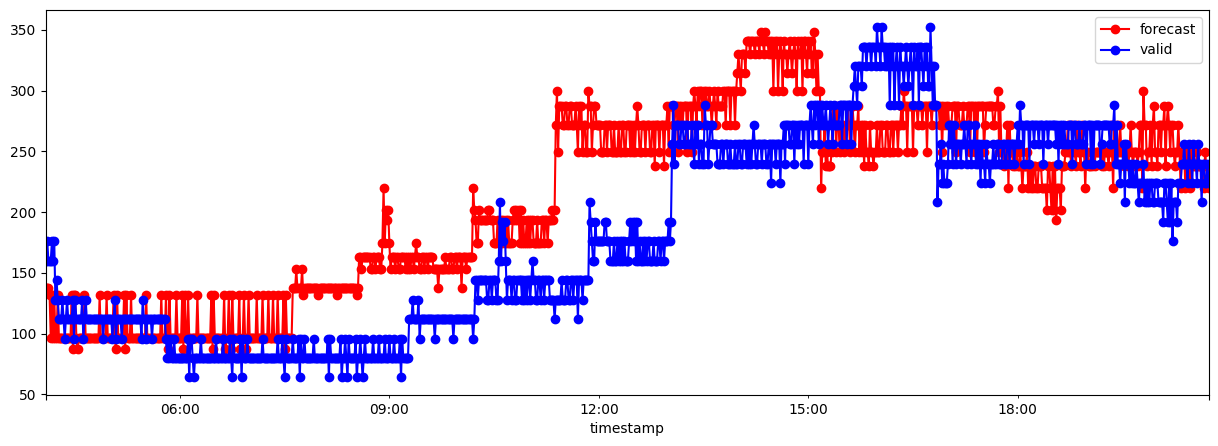

In [34]:
valid = pd.DataFrame({'valid' : test['y'][:1000]})
forecast = pd.DataFrame({'forecast' : xgb.predict(test['electric_energy_consumption(Wh)'])[:1000]}, index = valid.index)

fig, ax = plt.subplots(figsize=(15,5))

forecast.plot(ax=ax, color='red', marker="o", legend=True)
valid.plot(ax=ax, color='blue', marker="o", legend=True)


<Axes: xlabel='timestamp'>

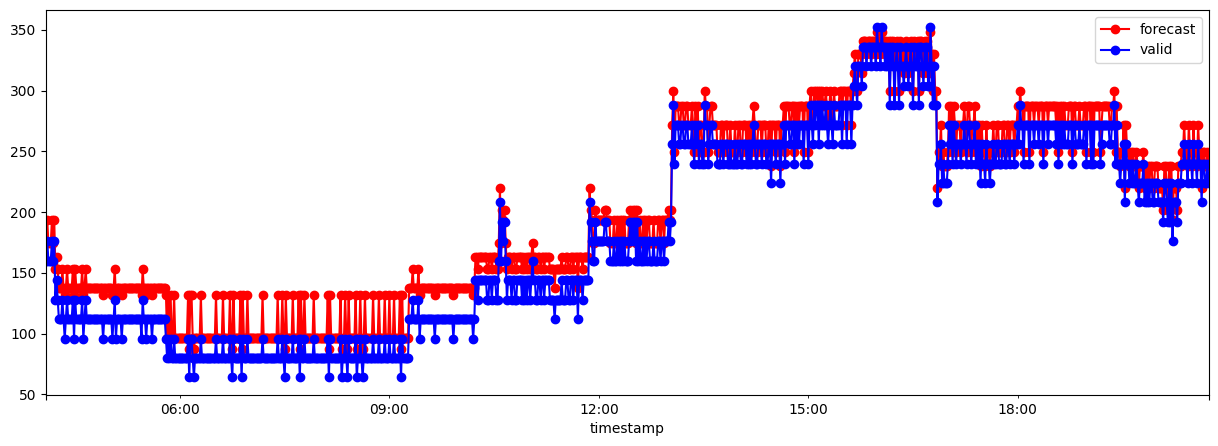

In [35]:
valid = pd.DataFrame({'valid' : test['y'][:1000]})
forecast = pd.DataFrame({'forecast' : xgb.predict(test['y'])[:1000]}, index = valid.index)

fig, ax = plt.subplots(figsize=(15,5))

forecast.plot(ax=ax, color='red', marker="o", legend=True)
valid.plot(ax=ax, color='blue', marker="o", legend=True)
